# Imporing required libraries and modules 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()
%matplotlib inline

# Importing the data

In [2]:
# assigning the data
Loan = pd.read_csv("bank-loan.csv")

In [3]:
#Complete overview of data 
Loan.describe()

## default variable having the missing values

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


## Data Preprocessing 

In [4]:
## dimensionality of data
Loan.shape

(850, 9)

In [5]:
## as we already know its classification model, our target variable is default checking how it dispersed
Loan.default.value_counts()

0.0    517
1.0    183
Name: default, dtype: int64

In [6]:
Loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [7]:
loan=Loan.copy()

In [8]:
loan.default.mode()

0    0.0
dtype: float64

In [9]:
loan.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


In [10]:
## Filling the na values in the default variable
loan.default.fillna(0, inplace = True)


In [11]:
loan.default.value_counts()

0.0    667
1.0    183
Name: default, dtype: int64

In [12]:
loan.columns

Index(['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt',
       'othdebt', 'default'],
      dtype='object')

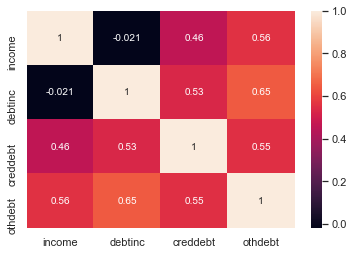

In [96]:
## Checking correlation in the numeric data

cnames = ['income', 'debtinc', 'creddebt','othdebt']
numerdata= loan[cnames]
cor_numdata = numerdata.corr()
sns.heatmap(cor_numdata, annot = True)

## Outlier Analysis  

Text(0.5, 1.0, 'Outlier analysis for othdebt')

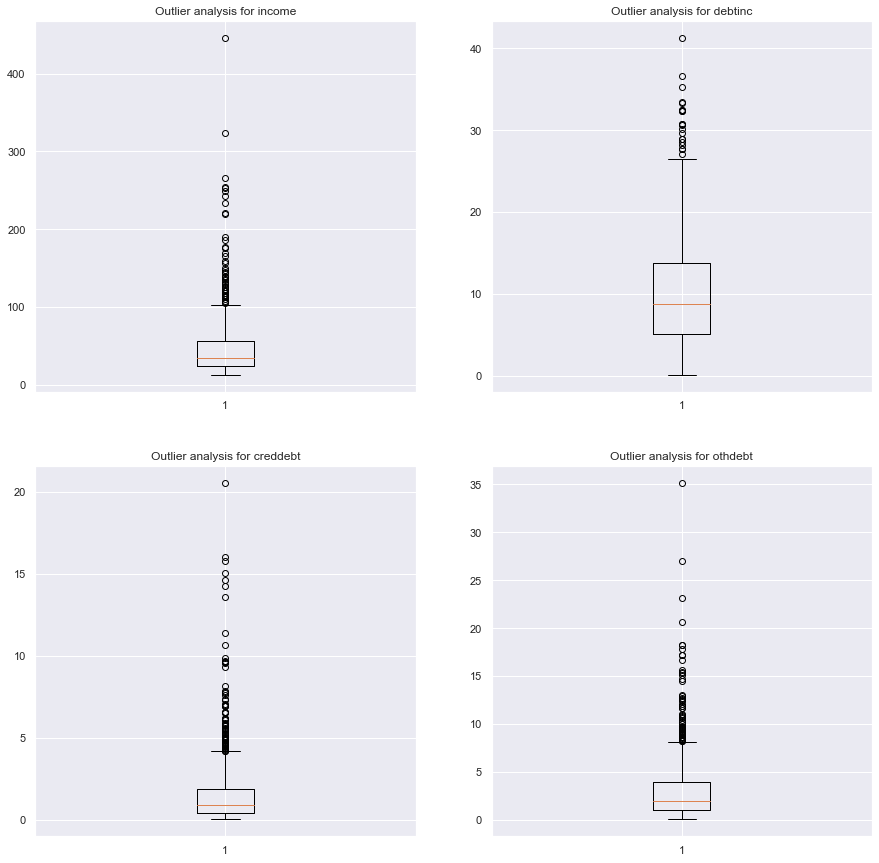

In [13]:
#### Outlier Analysis
plt.figure(figsize=(15,15))

plt.subplot(221)
plt.boxplot(loan.income )
plt.title("Outlier analysis for income")

plt.subplot(222)
plt.boxplot(loan.debtinc )
plt.title("Outlier analysis for debtinc")

plt.subplot(223)
plt.boxplot(loan.creddebt )
plt.title("Outlier analysis for creddebt")

plt.subplot(224)
plt.boxplot(loan.othdebt )
plt.title("Outlier analysis for othdebt")


In [46]:
####Removing the outliers
Outliers= ['othdebt','creddebt','debtinc','income']

for i in Outliers:
    
    q75 ,q25 = np.percentile(loan.loc[:,i] ,[75,25])
    
    iqr =q75-q25
    
    minimum = q25 -(1.5*iqr)
    maximum = q75+(1.5*iqr)
    
    loan.loc[loan[i]<minimum ,i]=np.nan
    loan.loc[loan[i]>maximum ,i]=np.nan

In [48]:
m_values=pd.DataFrame(loan.isnull().sum())
m_values

,0
age,0
ed,0
employ,0
address,0
income,53
debtinc,21
creddebt,69
othdebt,61
default,0


In [58]:
####Imputing the outlier
from fancyimpute import KNN
loan = pd.DataFrame(KNN(k = 3).fit_transform(loan), columns = loan.columns,index=loan.index)

Imputing row 1/850 with 2 missing, elapsed time: 0.236
Imputing row 101/850 with 1 missing, elapsed time: 0.237
Imputing row 201/850 with 0 missing, elapsed time: 0.238
Imputing row 301/850 with 3 missing, elapsed time: 0.239
Imputing row 401/850 with 0 missing, elapsed time: 0.241
Imputing row 501/850 with 0 missing, elapsed time: 0.242
Imputing row 601/850 with 0 missing, elapsed time: 0.244
Imputing row 701/850 with 0 missing, elapsed time: 0.245
Imputing row 801/850 with 0 missing, elapsed time: 0.247


In [72]:
missing=pd.DataFrame(loan.isnull().sum())
missing

,0
age,0
ed,0
employ,0
address,0
income,0
debtinc,0
creddebt,0
othdebt,0
default,0


Text(0.5, 1.0, 'Outlier analysis for othdebt')

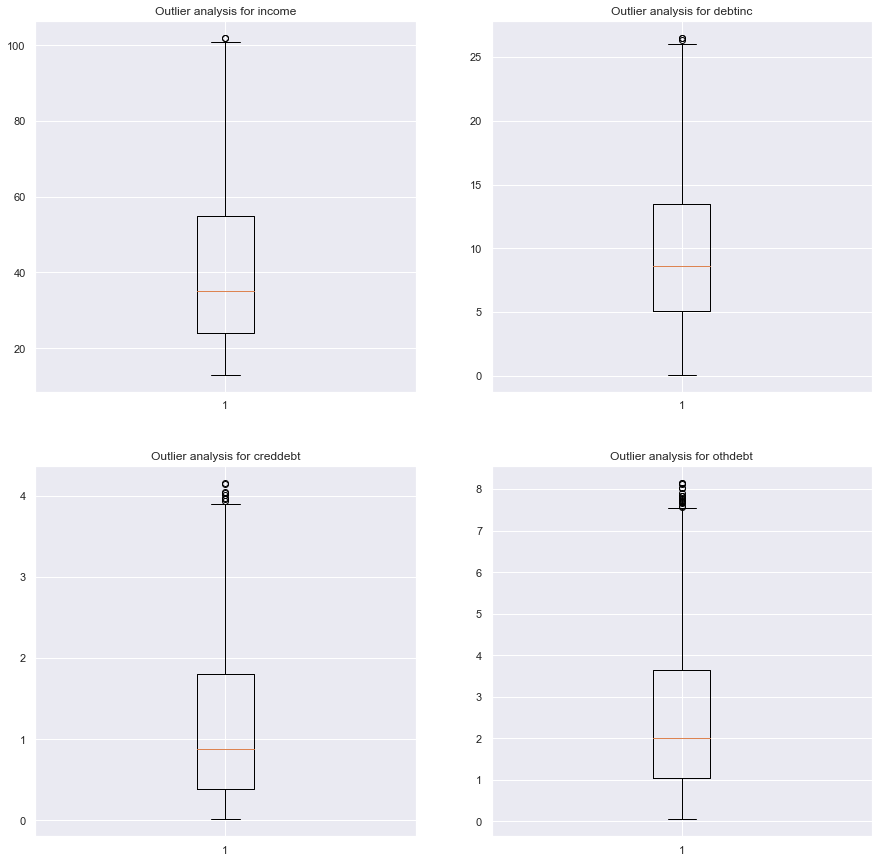

In [99]:
###Cross verification after imputing the outliers

fig1= plt.figure(figsize=(15,15))

plt.subplot(221)
plt.boxplot(loan.income )
plt.title("Outlier analysis for income")

plt.subplot(222)
plt.boxplot(loan.debtinc )
plt.title("Outlier analysis for debtinc")

plt.subplot(223)
plt.boxplot(loan.creddebt )
plt.title("Outlier analysis for creddebt")

plt.subplot(224)
plt.boxplot(loan.othdebt )
plt.title("Outlier analysis for othdebt")

In [100]:
fig1.savefig("outlier after removal.png")

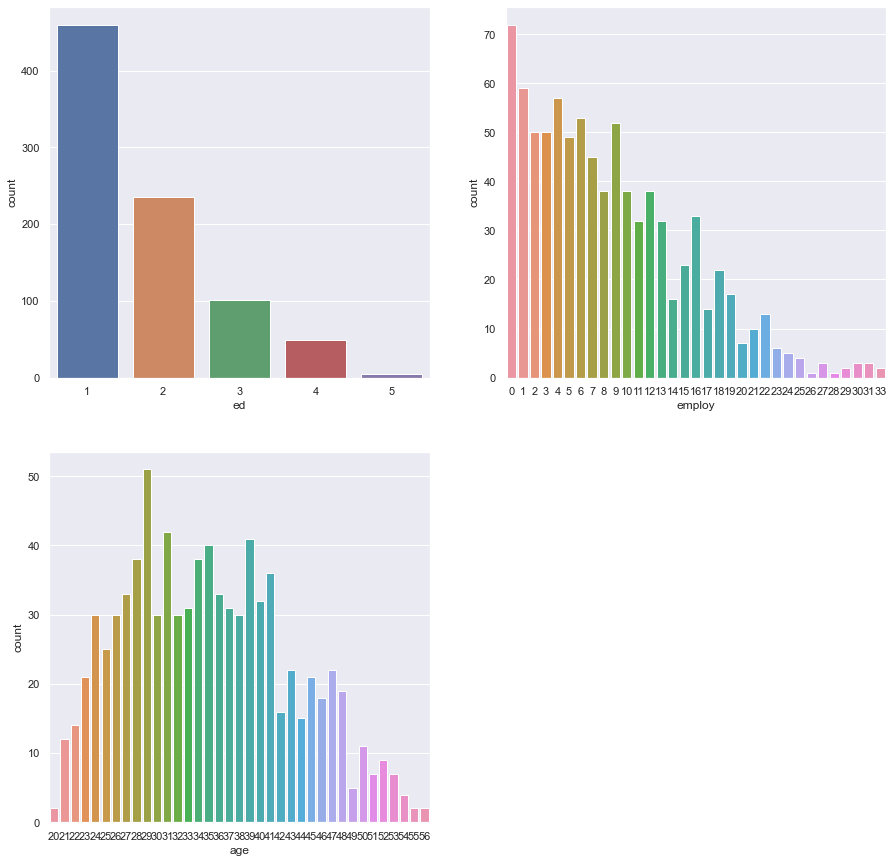

In [14]:
##Checking how set of variable dispersed
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(loan.ed)
plt.subplot(222)
sns.countplot(loan.employ)
plt.subplot(223)
sns.countplot(loan.age)


<Figure size 1080x1080 with 0 Axes>

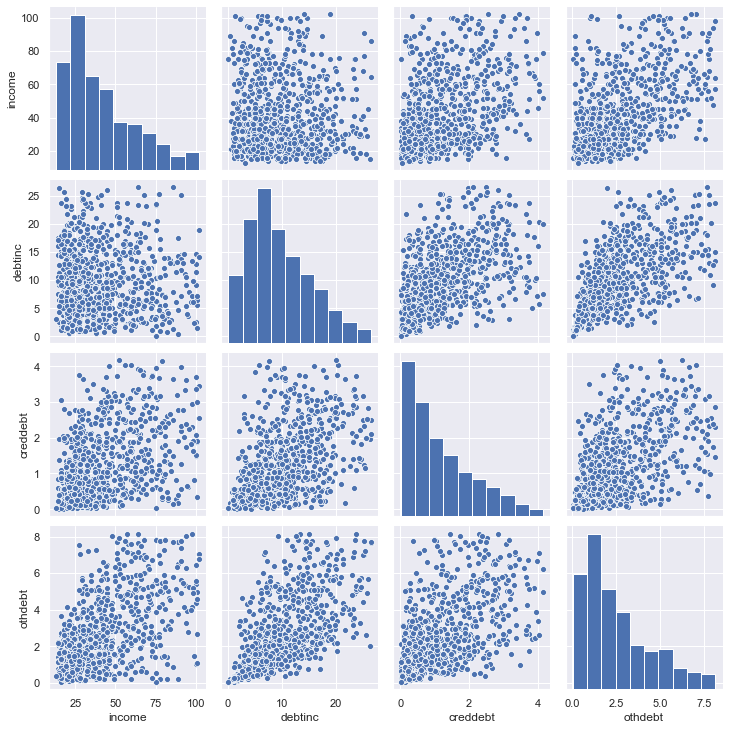

In [127]:
## realtion of numeric data
Fig3 = plt.figure(figsize=(15,15))
sns.pairplot(numerdata)

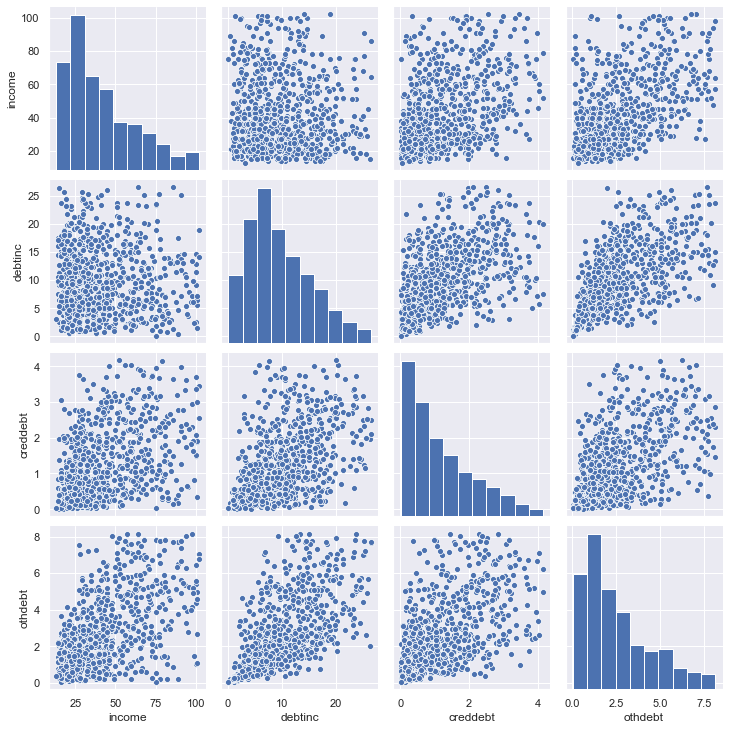

In [129]:
sns_plot=sns.pairplot(numerdata)
sns_plot.savefig("output.png")

In [16]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   850 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [17]:
loan['default'] = loan.default.astype("object")
loan["ed"] = loan.ed.astype("object")
print(loan.dtypes)

age           int64
ed           object
employ        int64
address       int64
income        int64
debtinc     float64
creddebt    float64
othdebt     float64
default      object
dtype: object


## Model Development
     --  Desicion Tree   
     --  Random Forest
     --  Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [73]:
X = loan.values[:, 0:-1]
Y = loan.values[:,-1]
Y = Y.astype("int")

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2, random_state=1)

In [74]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Logistic Regression model on the Training set

In [75]:
from sklearn.linear_model import LogisticRegression
Logistic  = LogisticRegression()

In [76]:
Logistic.fit(X_train, y_train)

LogisticRegression()

In [77]:
##Predicting the Test set results
y_pred = Logistic.predict(X_test)

## Evaluating the Model Performance 

In [78]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[131   3]
 [ 29   7]]


0.8117647058823529

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression')

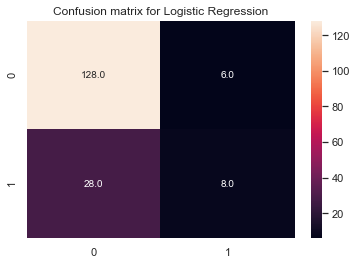

In [124]:
sns.heatmap(cm, annot = True, fmt='.1f' )
plt.title("Confusion matrix for Logistic Regression")

In [79]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8117647058823529
Precision: 0.7
Recall: 0.19444444444444445


## ROC and AUC

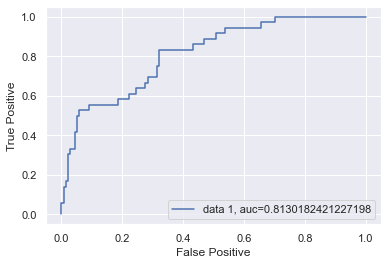

In [80]:
y_pred_proba = Logistic.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.legend(loc=4)
plt.show()

## Training the Decision Tree Classifier model on the Training set

In [81]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 2020)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=2020)

In [82]:
##Predicting the Test set results
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
accuracy_score(y_test, y_pred)

[[113  21]
 [ 21  15]]


0.7529411764705882

Text(0.5, 1.0, 'Confusion matrix for Desicion Tree')

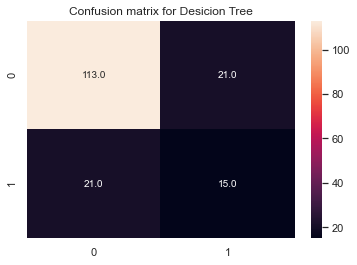

In [125]:
sns.heatmap(cm1, annot = True, fmt='.1f' )
plt.title("Confusion matrix for Desicion Tree")

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7529411764705882
Precision: 0.4166666666666667
Recall: 0.4166666666666667


## Training the Decision Tree Classifier model on the Training set

In [84]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 2020)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=2020)

In [85]:
##Predicting the Test set results
y_pred = classifier.predict(X_test)

In [113]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[128   6]
 [ 28   8]]


0.8

Text(0.5, 1.0, 'Confusion matrix for Random Forest')

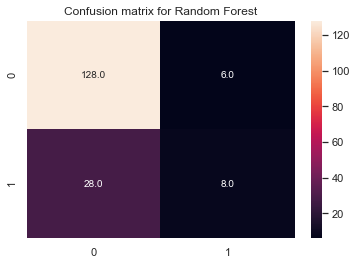

In [126]:
sns.heatmap(cm2, annot = True, fmt='.1f' )
plt.title("Confusion matrix for Random Forest")

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.5714285714285714
Recall: 0.2222222222222222


## Total overview of the ROC and AUC on the 3 models 

In [88]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

classifiers = [LogisticRegression(random_state=2020), 
               DecisionTreeClassifier(random_state=2020),
               RandomForestClassifier(random_state=2020)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

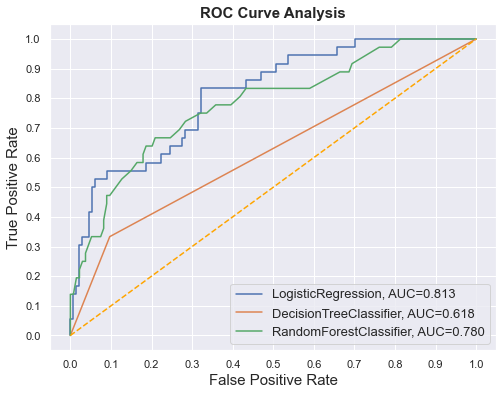

In [89]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()